# Summer Olympics Data Analysis Assignment

### 1. In how many cities Summer Olympics is held so far?

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("summer.csv")
df.head()
cities=df.groupby("City")
print(df["City"].unique().size)

22


### 2. Which sport is having most number of Gold Medals so far? (Top 5)

In [8]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


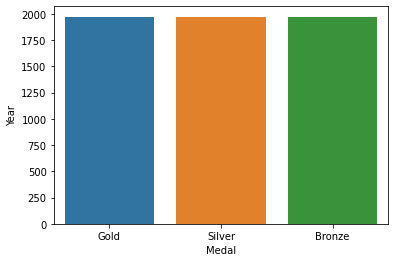

In [59]:
Medal = df.groupby("Medal")
ax = sns.barplot(x="Medal",y="Year" ,data=df)

In [49]:
Medal.get_group("Gold")


,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold
13,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold
...,...,...,...,...,...,...,...,...,...
31145,2012,London,Wrestling,Wrestling Freestyle,"NOROOZI, Omid Haji",IRI,Men,Wg 60 KG,Gold
31149,2012,London,Wrestling,Wrestling Freestyle,"KIM, Hyeonwoo",KOR,Men,Wg 66 KG,Gold
31153,2012,London,Wrestling,Wrestling Freestyle,"VLASOV, Roman",RUS,Men,Wg 74 KG,Gold
31157,2012,London,Wrestling,Wrestling Freestyle,"KHUGAEV, Alan",RUS,Men,Wg 84 KG,Gold


In [50]:
gold=[]
for Sport in df["Sport"].unique():
    gold.append([Sport , len(df[df["Sport"] == Sport])])
gold_medals = pd.DataFrame(gold,columns = ["Sport","Medal"]).sort_values(by="Medal", ascending=False)

In [51]:
gold_medals.head()


,Sport,Medal
0,Aquatics,4170
1,Athletics,3638
17,Rowing,2667
4,Gymnastics,2307
3,Fencing,1613


### 3. Which sport is having most number of medals so far? (Top 5)

In [ ]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [57]:
medals=[]
for Sport in df["Sport"].unique():
    medals.append([Sport , len(df[df["Sport"] == Sport])])
pd.DataFrame(medals,columns = ["Sport","Medal"]).sort_values(by="Medal", ascending=False).head()

,Sport,Medal
0,Aquatics,4170
1,Athletics,3638
17,Rowing,2667
4,Gymnastics,2307
3,Fencing,1613


### 4. Which player has won most number of medals? (Top 5)

In [ ]:
player = []
for Athlete in df["Athlete"].unique():
    player.append([Athlete , len(df[df["Athlete"]  == Athlete])])
pd.DataFrame(player,columns = ["Athlete","No of Medals"]).sort_values(by="No of Medals", ascending=False).head()

,Athlete,No of Medals
18640,"PHELPS, Michael",22
7197,"LATYNINA, Larisa",18
9948,"ANDRIANOV, Nikolay",15
6591,"ONO, Takashi",13
5103,"MANGIAROTTI, Edoardo",13


### 5. Which player has won most number Gold Medals of medals? (Top 5)

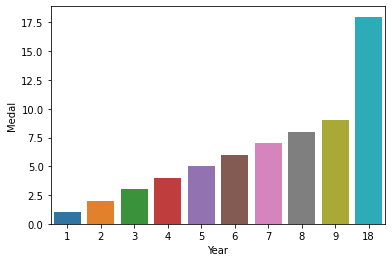

In [27]:
gold = df[df["Medal"]=="Gold"].groupby("Athlete").count().sort_values(["Medal"],ascending=False)
ax = sns.barplot(x="Year", y="Medal", data=gold)

In [ ]:
gold.head()

,Year,City,Sport,Discipline,Country,Gender,Event,Medal
Athlete,,,,,,,,
"PHELPS, Michael",18,18,18,18,18,18,18,18
"LEWIS, Carl",9,9,9,9,9,9,9,9
"NURMI, Paavo",9,9,9,9,9,9,9,9
"SPITZ, Mark",9,9,9,9,9,9,9,9
"LATYNINA, Larisa",9,9,9,9,9,9,9,9


### 6. In which year India won first Gold Medal in Summer Olympics?

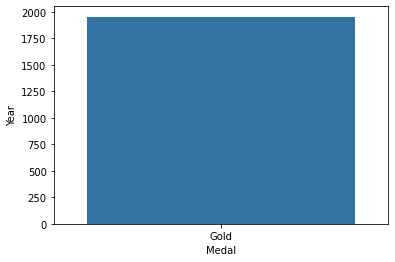

In [39]:
india = df[df["Country"]=='IND']
gold_india = india[india["Medal"]=="Gold"].sort_values(["Year"],ascending=True)
ax = sns.barplot(x="Medal",y="Year" ,data=gold_india)

In [ ]:
gold_india["Year"].head(1)

5512    1928
Name: Year, dtype: int64

### 7. Which event is most popular in terms on number of players? (Top 5)

In [46]:
event = []
for Event in df["Event"].unique():
    event.append([Event , len(df[df["Event"]  == Event])])
pd.DataFrame(event,columns = ["Event","No of Players"]).sort_values(by="No of Players", ascending=False).head()


,Event,No of Players
80,Football,1497
176,Hockey,1422
138,Team Competition,1147
327,Basketball,1012
337,Handball,973


### 8. Which sport is having most female Gold Medalists? (Top 5)

In [ ]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


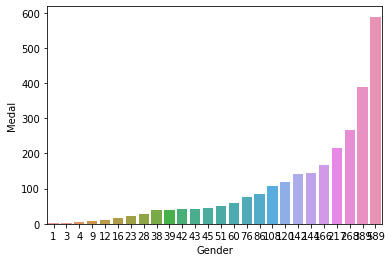

In [47]:
gold = df[df["Medal"]=="Gold"]
gold_female = gold[gold["Gender"]=="Women"].groupby("Sport").count().sort_values(["Medal"],ascending=False)
ax = sns.barplot(x="Gender",y="Medal" ,data=gold_female)


In [ ]:
gold_female["Medal"]

Sport
Aquatics             589
Athletics            389
Gymnastics           268
Rowing               217
Volleyball           166
Hockey               144
Handball             142
Basketball           120
Fencing              108
Football              86
Canoe / Kayak         76
Softball              60
Equestrian            51
Cycling               45
Shooting              43
Judo                  42
Archery               39
Tennis                38
Sailing               38
Weightlifting         28
Badminton             23
Table Tennis          23
Taekwondo             16
Wrestling             12
Canoe                  9
Skating                4
Modern Pentathlon      4
Triathlon              4
Boxing                 3
Golf                   1
Name: Medal, dtype: int64